In [9]:
from bs4 import BeautifulSoup
import requests
import re

In [10]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_in_India'
page= requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [11]:
soup.find_all('table')[15]

<table class="wikitable sortable">
<tbody><tr>
<th>#
</th>
<th>Code<sup class="reference" id="cite_ref-distcodes_9-13"><a href="#cite_note-distcodes-9">[8]</a></sup>
</th>
<th>District<sup class="reference" id="cite_ref-censusdist2011_10-26"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
</th>
<th>Headquarters
</th>
<th>Population <br/>(2011)
</th>
<th>Area <br/>(km<sup>2</sup>)
</th>
<th>Density <br/>(/km<sup>2</sup>)<sup class="reference" id="cite_ref-censusdist2011_10-27"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
</th></tr>
<tr>
<td>1</td>
<td>AG</td>
<td><a href="/wiki/Agar_Malwa_district" title="Agar Malwa district">Agar Malwa</a></td>
<td><a href="/wiki/Agar,_Madhya_Pradesh" title="Agar, Madhya Pradesh">Agar</a></td>
<td style="text-align:right">571,275</td>
<td style="text-align:right">2,785</td>
<td style="text-align:right">205
</td></tr>
<tr>
<td>2</td>
<td>AL</td>
<td><a href="/wiki/Alirajpur_district" title="Alirajpur district">Alirajpur</a></td>
<td><a href

In [12]:
table = soup.find_all('table')[15]

In [13]:
headers = table.find_all('th')

In [14]:
headers

[<th>#
 </th>,
 <th>Code<sup class="reference" id="cite_ref-distcodes_9-13"><a href="#cite_note-distcodes-9">[8]</a></sup>
 </th>,
 <th>District<sup class="reference" id="cite_ref-censusdist2011_10-26"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
 </th>,
 <th>Headquarters
 </th>,
 <th>Population <br/>(2011)
 </th>,
 <th>Area <br/>(km<sup>2</sup>)
 </th>,
 <th>Density <br/>(/km<sup>2</sup>)<sup class="reference" id="cite_ref-censusdist2011_10-27"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
 </th>]

In [15]:
column_headers_text = [re.sub(r'\[\d+\]', '', header.text.strip().replace('#','S.No.')) for header in headers]

In [16]:
print(column_headers_text)

['S.No.', 'Code', 'District', 'Headquarters', 'Population (2011)', 'Area (km2)', 'Density (/km2)']


In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(columns = column_headers_text)

In [19]:
df

,S.No.,Code,District,Headquarters,Population (2011),Area (km2),Density (/km2)


In [20]:
column_data = table.find_all('tr')

In [21]:
print(column_data)

[<tr>
<th>#
</th>
<th>Code<sup class="reference" id="cite_ref-distcodes_9-13"><a href="#cite_note-distcodes-9">[8]</a></sup>
</th>
<th>District<sup class="reference" id="cite_ref-censusdist2011_10-26"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
</th>
<th>Headquarters
</th>
<th>Population <br/>(2011)
</th>
<th>Area <br/>(km<sup>2</sup>)
</th>
<th>Density <br/>(/km<sup>2</sup>)<sup class="reference" id="cite_ref-censusdist2011_10-27"><a href="#cite_note-censusdist2011-10">[9]</a></sup>
</th></tr>, <tr>
<td>1</td>
<td>AG</td>
<td><a href="/wiki/Agar_Malwa_district" title="Agar Malwa district">Agar Malwa</a></td>
<td><a href="/wiki/Agar,_Madhya_Pradesh" title="Agar, Madhya Pradesh">Agar</a></td>
<td style="text-align:right">571,275</td>
<td style="text-align:right">2,785</td>
<td style="text-align:right">205
</td></tr>, <tr>
<td>2</td>
<td>AL</td>
<td><a href="/wiki/Alirajpur_district" title="Alirajpur district">Alirajpur</a></td>
<td><a href="/wiki/Alirajpur" title="Alirajpur">Al

In [22]:
for row in column_data[1:]:
        row_data = row.find_all('td')
        indi_row_data = [data.text.strip() for data in row_data]
        length = len(df)
        df.loc[length] = indi_row_data

In [23]:
df

,S.No.,Code,District,Headquarters,Population (2011),Area (km2),Density (/km2)
0,1,AG,Agar Malwa,Agar,"571,275","2,785",205
1,2,AL,Alirajpur,Alirajpur,"728,677","3,182",229
2,3,AP,Anuppur,Anuppur,"749,521","3,747",200
3,4,AS,Ashoknagar,Ashoknagar,"844,979","4,674",181
4,5,BL,Balaghat,Balaghat,"1,701,156","9,229",184
5,6,BR,Barwani,Barwani,"1,385,659","5,432",256
6,7,BE,Betul,Betul,"1,575,247","10,043",157
7,8,BD,Bhind,Bhind,"1,703,562","4,459",382
8,9,BP,Bhopal,Bhopal,"2,368,145","2,772",854
9,10,BU,Burhanpur,Burhanpur,"756,993","3,427",221


In [29]:
import numpy as np

In [31]:
df.replace('-',np.nan, inplace=True)

null_counts = df.isnull().sum()
print(null_counts)

S.No.                0
Code                 0
District             0
Headquarters         0
Population (2011)    3
Area (km2)           3
Density (/km2)       3
dtype: int64


In [35]:
df.dropna(inplace=True)

In [42]:
nulls = df.isnull().sum()
print(nulls)

S.No.                0
Code                 0
District             0
Headquarters         0
Population (2011)    0
Area (km2)           0
Density (/km2)       0
dtype: int64


In [41]:
#importing data to csv

df.to_csv(r'C:\Users\Ragini\Desktop\Completed Projects\New folder\MP Population.csv',index = False)

In [43]:
df

,S.No.,Code,District,Headquarters,Population (2011),Area (km2),Density (/km2)
0,1,AG,Agar Malwa,Agar,"571,275","2,785",205
1,2,AL,Alirajpur,Alirajpur,"728,677","3,182",229
2,3,AP,Anuppur,Anuppur,"749,521","3,747",200
3,4,AS,Ashoknagar,Ashoknagar,"844,979","4,674",181
4,5,BL,Balaghat,Balaghat,"1,701,156","9,229",184
5,6,BR,Barwani,Barwani,"1,385,659","5,432",256
6,7,BE,Betul,Betul,"1,575,247","10,043",157
7,8,BD,Bhind,Bhind,"1,703,562","4,459",382
8,9,BP,Bhopal,Bhopal,"2,368,145","2,772",854
9,10,BU,Burhanpur,Burhanpur,"756,993","3,427",221


In [44]:
import matplotlib.pyplot as plt

In [49]:
df.columns = df.columns.str.replace(' ', '_').str.replace('\(2011\)', '')

In [50]:
print(df.columns)

Index(['S.No.', 'Code', 'District', 'Headquarters', 'Population_(2011)',
       'Area_(km2)', 'Density_(/km2)'],
      dtype='object')


In [51]:
df['Population'] = df['Population_(2011)'].str.replace(',', '').astype(float)
df['Area'] = df['Area_(km2)'].str.replace(',', '').astype(float)

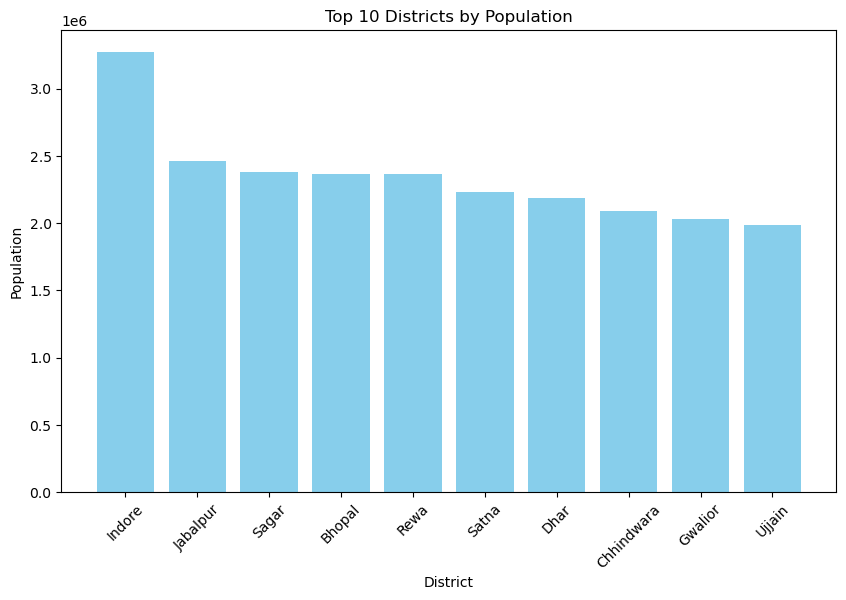

In [52]:
top_10_population = df.nlargest(10, 'Population')
plt.figure(figsize=(10, 6))
plt.bar(top_10_population['District'], top_10_population['Population'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Population')
plt.title('Top 10 Districts by Population')
plt.xticks(rotation=45)
plt.show()

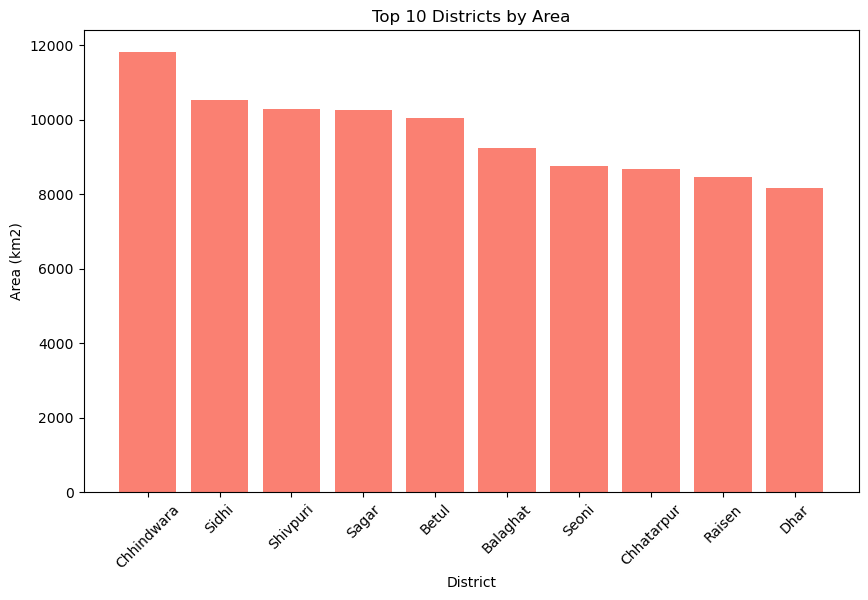

In [53]:
top_10_area = df.nlargest(10, 'Area')
plt.figure(figsize=(10, 6))
plt.bar(top_10_area['District'], top_10_area['Area'], color='salmon')
plt.xlabel('District')
plt.ylabel('Area (km2)')
plt.title('Top 10 Districts by Area')
plt.xticks(rotation=45)
plt.show()

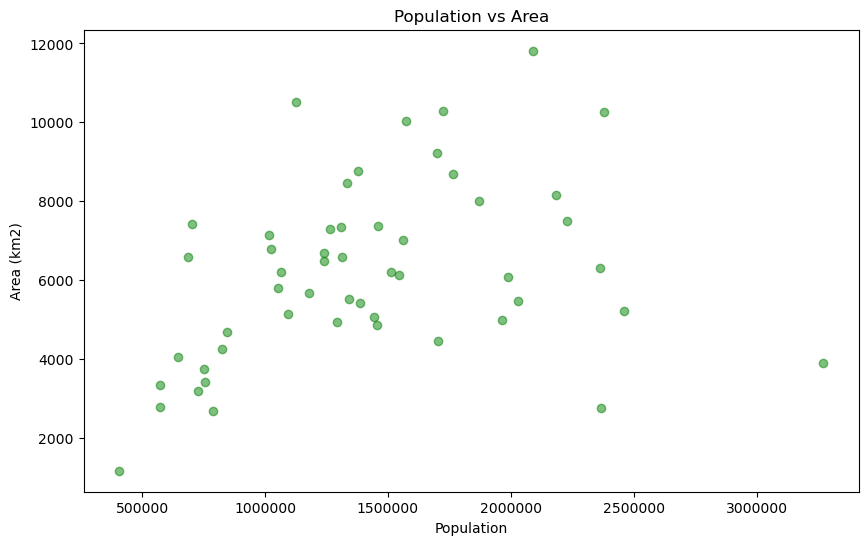

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Area'], color='green', alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Area (km2)')
plt.title('Population vs Area')
plt.ticklabel_format(style='plain', axis='both')
plt.show()